# CS 513 Project Group 4: AIRLINE PASSENGER SATISFACTION

1. Shivang Medhekar (smedheka@stevens.edu)
2. Mingfang Liang (mliang8@stevens.edu)
3. Yutong Wei (ywei42@stevens.edu)
4. Jiani Yu (jyu42@stevens.edu)

## Loading Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay

import pickle
import pathlib

import warnings
warnings.filterwarnings("ignore")

/Users/shivangmedhekar/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Getting Current Directory Path

In [2]:
DIRPATH = str(pathlib.Path().resolve())
DIRPATH

'/Users/shivangmedhekar/Desktop/CS513_Group6'

## Loading Dataset

In [3]:
train_data = pd.read_csv("Dataset/train.csv")
test_data = pd.read_csv("Dataset/test.csv")
dataset = pd.concat(objs = [train_data, test_data], axis = 0)

## Data Exploration

In [4]:
dataset.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,70172,5047,110028,24026,119299
Gender,Male,Male,Female,Female,Male
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,13,25,26,25,61
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Eco Plus,Business,Business,Business,Business
Flight Distance,460,235,1142,562,214
Inflight wifi service,3,3,2,2,3
Departure/Arrival time convenient,4,2,2,5,3


Dropping non-essential data

In [5]:
dataset = dataset.drop(columns = ['Unnamed: 0', 'id'], axis = 1)

In [6]:
dataset.shape

(129880, 23)

In [7]:
dataset.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    12988

In [9]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129880.0,3.358077,1.334049,0.0,2.0,4.0,4.0,5.0


## Data Analysis

In [10]:
sns.set_theme(style = 'whitegrid', palette = 'bright')

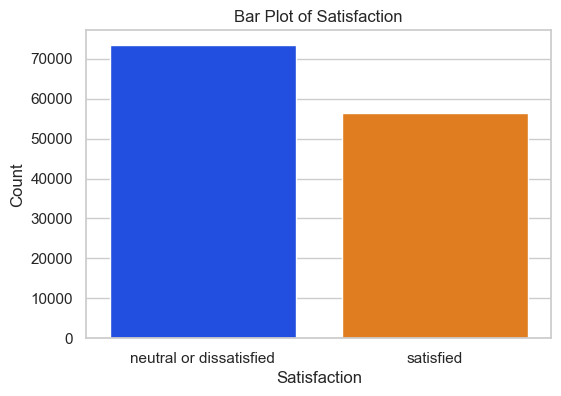

In [11]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data = dataset, x = 'satisfaction')
plt.title('Bar Plot of Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

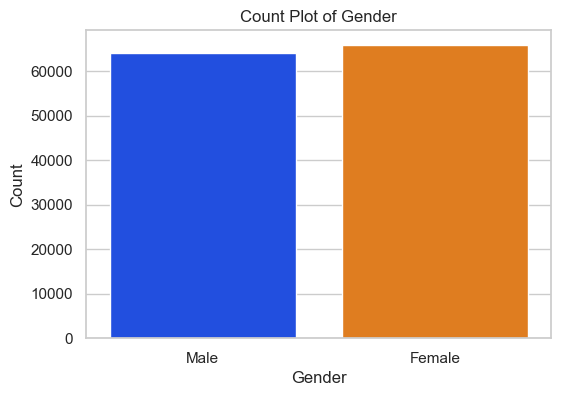

In [12]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=dataset, x='Gender')
plt.title('Count Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

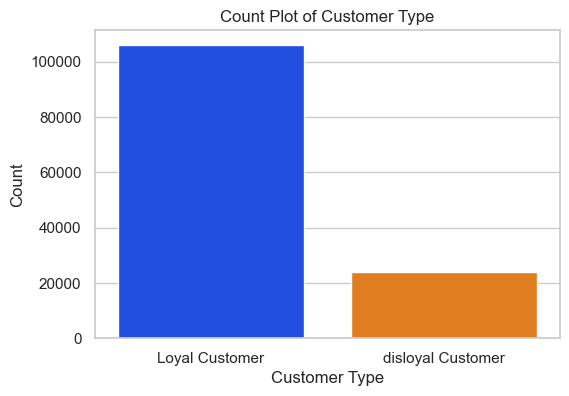

In [13]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=dataset, x='Customer Type')
plt.title('Count Plot of Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

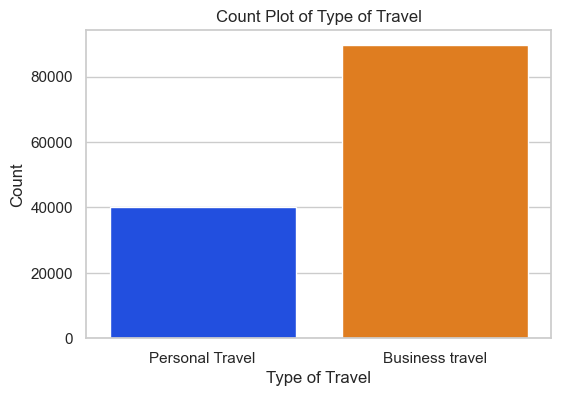

In [14]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=dataset, x='Type of Travel')
plt.title('Count Plot of Type of Travel')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.show()

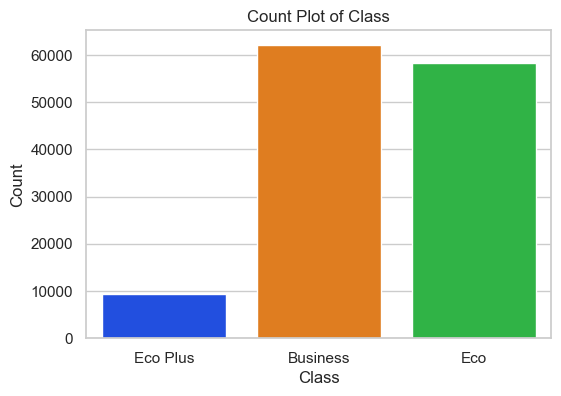

In [15]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=dataset, x='Class')
plt.title('Count Plot of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [16]:
numeric_features = dataset.select_dtypes(include=np.number)
numeric_features.shape

(129880, 18)

In [17]:
def plot_histogram(feature):
    plt.hist(dataset[feature], bins = 50)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(feature))
    plt.show()

[Text(0.5, 1.0, 'Histogram of Age')]

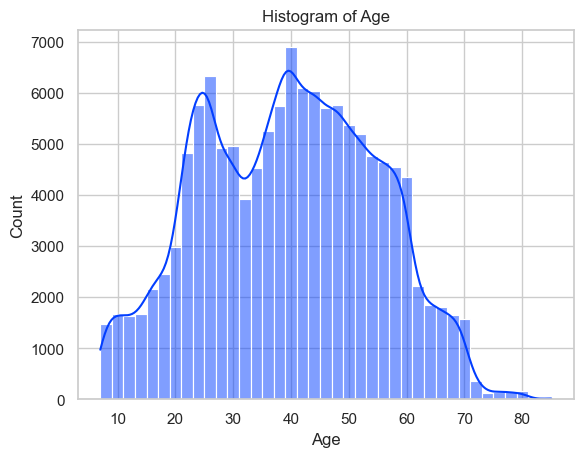

In [18]:
sns.histplot(data=numeric_features, x='Age', binwidth=2, kde=True).set(title='Histogram of Age')

[Text(0.5, 1.0, 'Histogram of Flight Distance')]

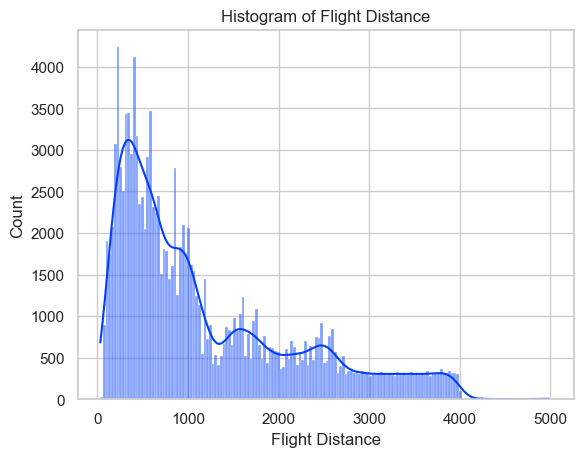

In [19]:
sns.histplot(data=numeric_features, x='Flight Distance', binwidth=30, kde=True).set(title='Histogram of Flight Distance')

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Flight Distance'}>,
        <AxesSubplot: title={'center': 'Inflight wifi service'}>,
        <AxesSubplot: title={'center': 'Departure/Arrival time convenient'}>],
       [<AxesSubplot: title={'center': 'Ease of Online booking'}>,
        <AxesSubplot: title={'center': 'Gate location'}>,
        <AxesSubplot: title={'center': 'Food and drink'}>,
        <AxesSubplot: title={'center': 'Online boarding'}>],
       [<AxesSubplot: title={'center': 'Seat comfort'}>,
        <AxesSubplot: title={'center': 'Inflight entertainment'}>,
        <AxesSubplot: title={'center': 'On-board service'}>,
        <AxesSubplot: title={'center': 'Leg room service'}>],
       [<AxesSubplot: title={'center': 'Baggage handling'}>,
        <AxesSubplot: title={'center': 'Checkin service'}>,
        <AxesSubplot: title={'center': 'Inflight service'}>,
        <AxesSubplot: title={'center': 'Cleanliness'}>],
       [<AxesSub

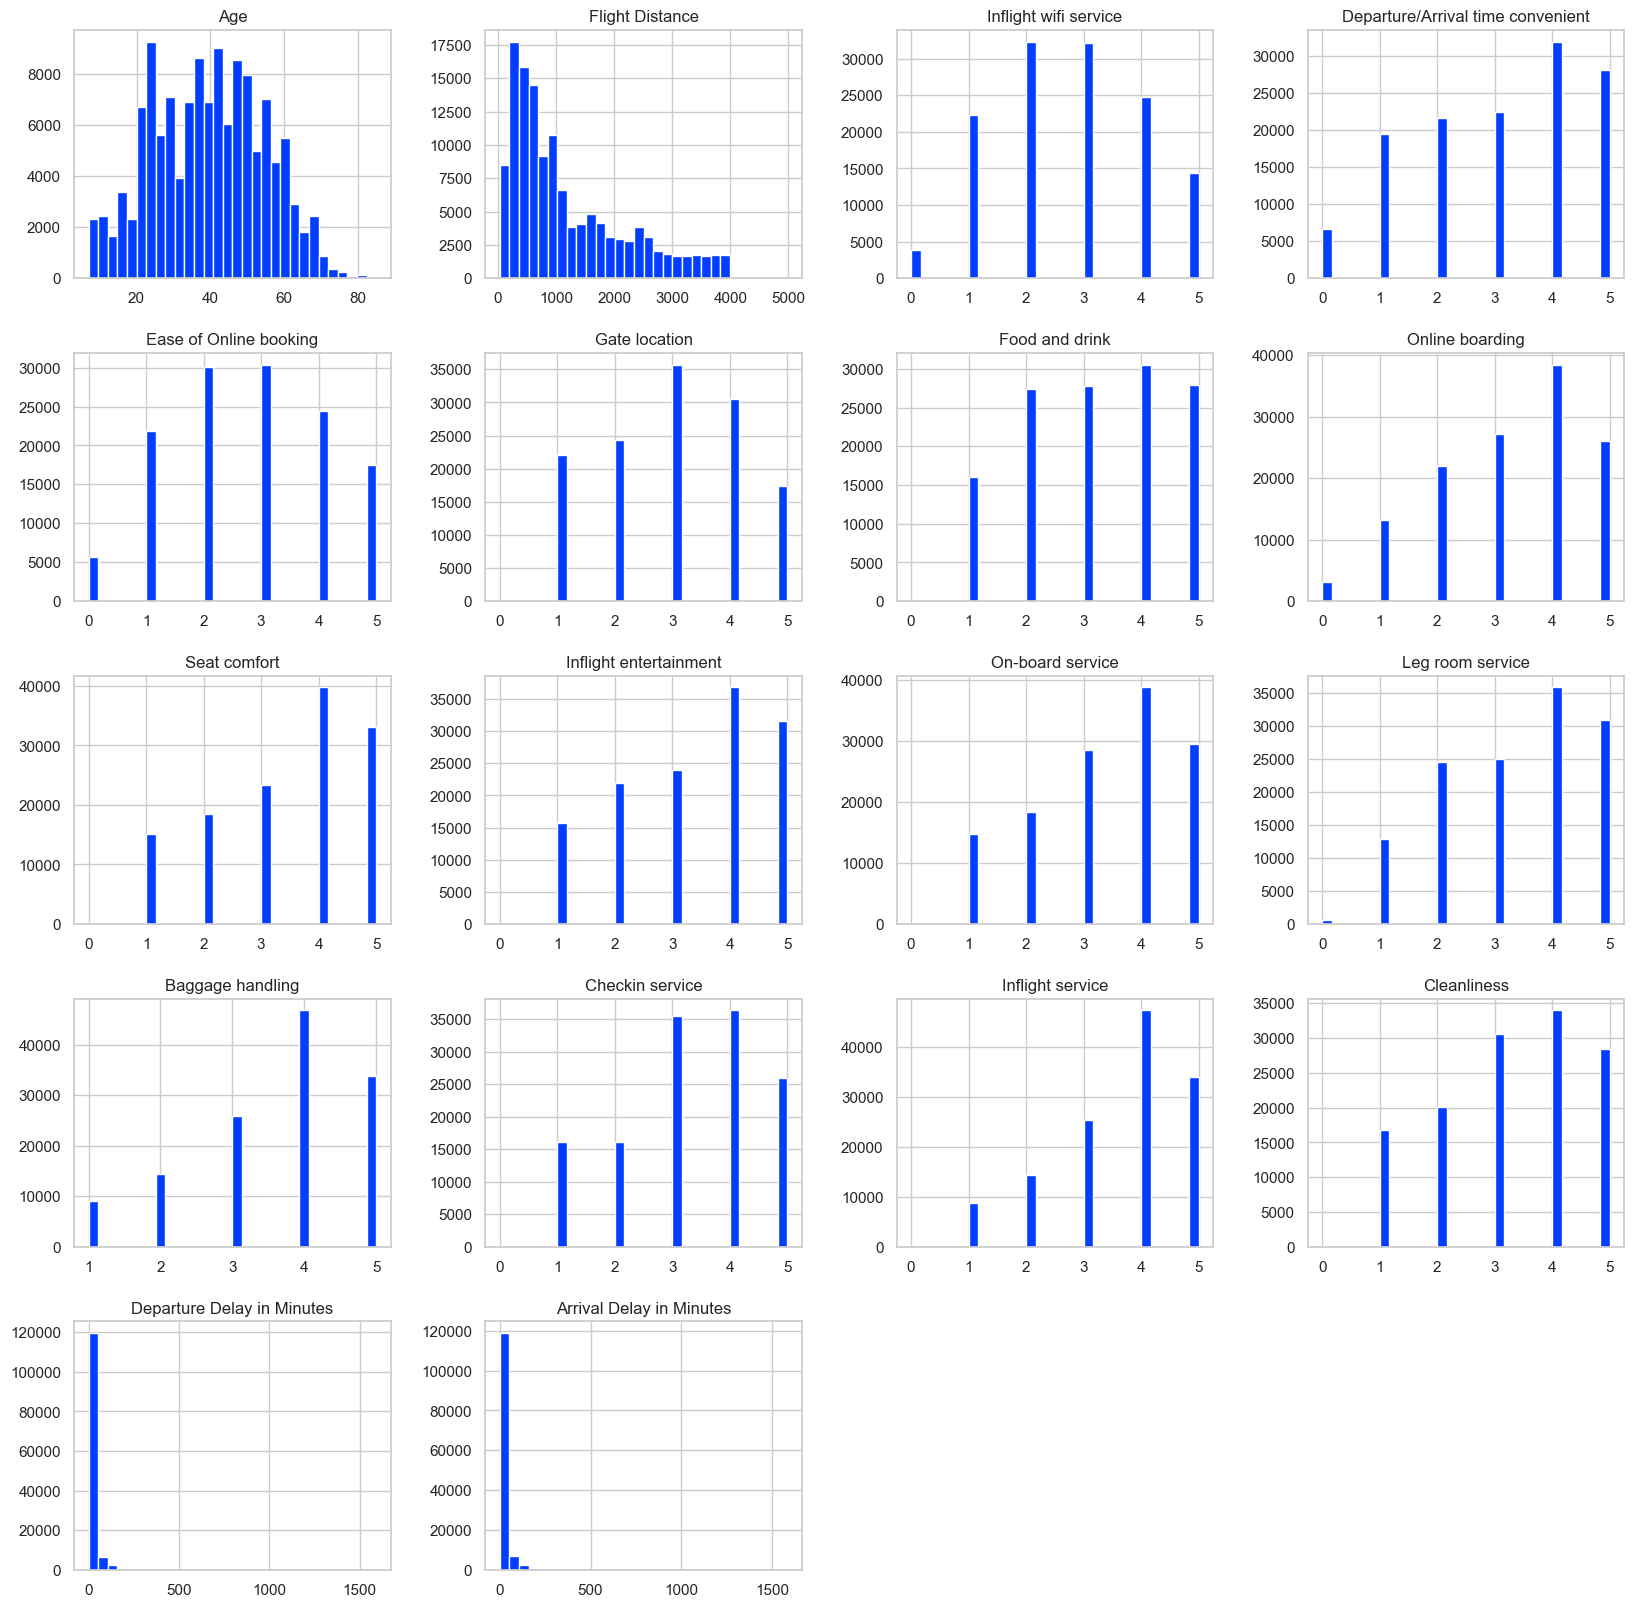

In [20]:
numeric_features.hist(bins=30, figsize=[20,20])

### Heatmap

<AxesSubplot: >

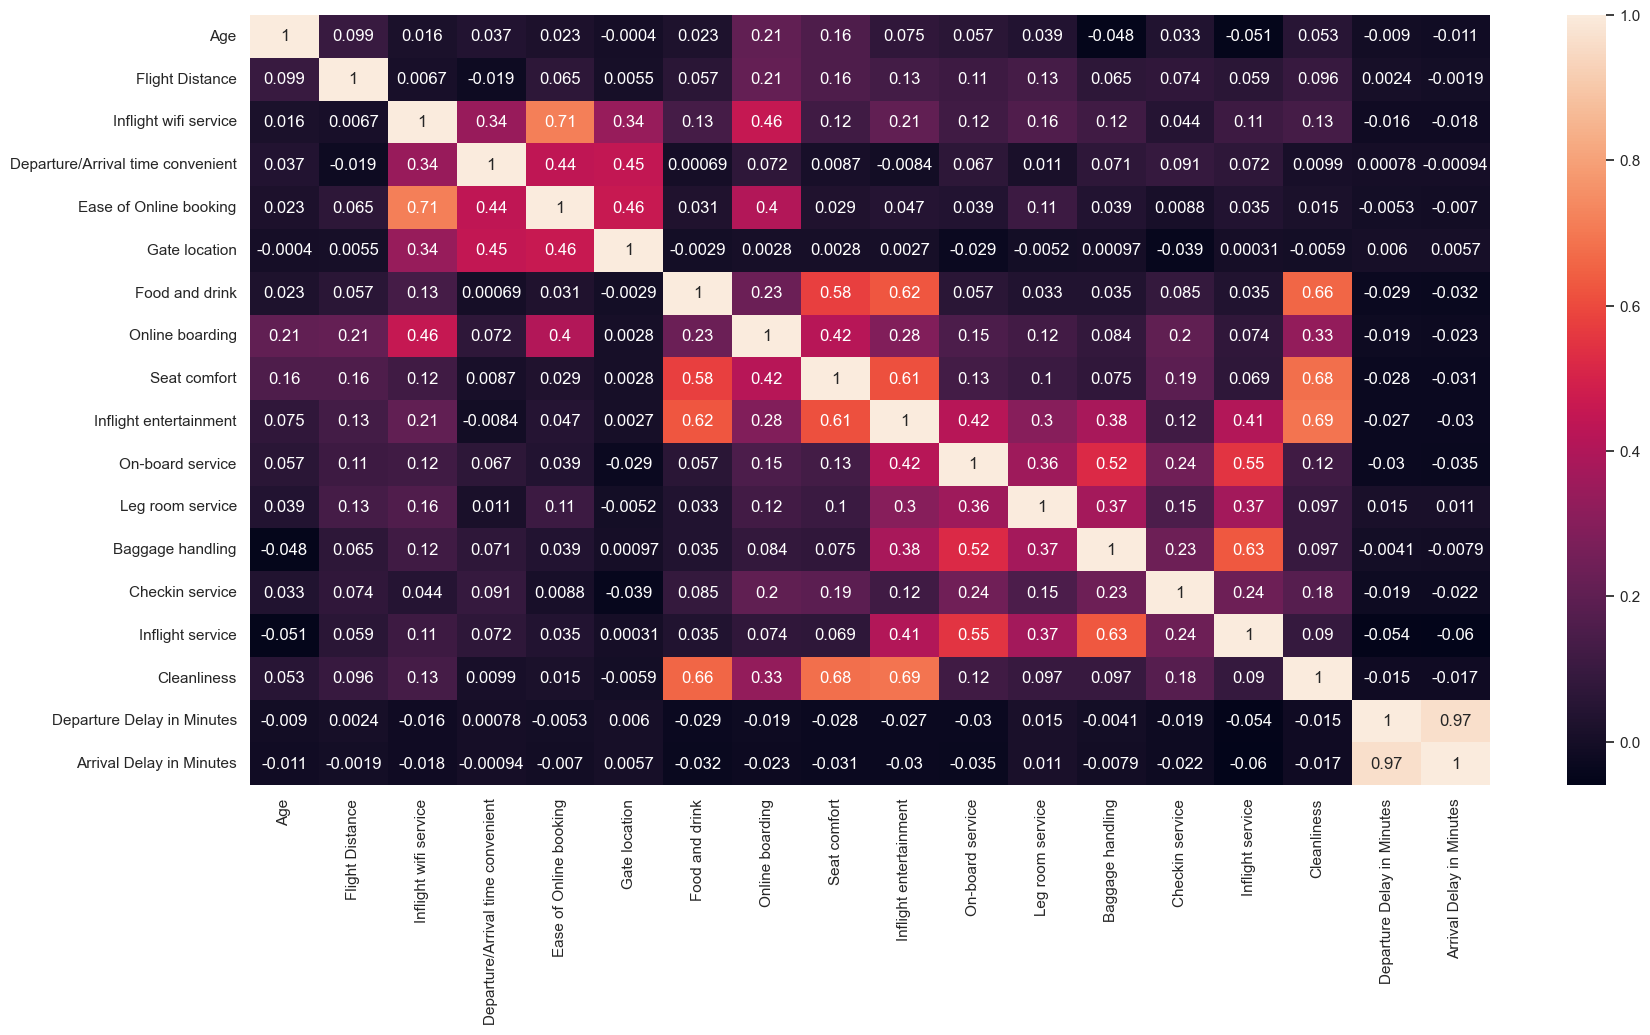

In [21]:
corelation = dataset.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

## Data Cleaning

In [22]:
dataset.isnull().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes              True
satisfaction                         False
dtype: bool

In [23]:
dataset.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [24]:
null_value_rows = dataset[dataset.isnull().any(axis=1)]
null_value_rows.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied


In [25]:
null_value_rows.shape

(393, 23)

In [26]:
dataset['Arrival Delay in Minutes'] = dataset['Arrival Delay in Minutes'].fillna(dataset['Arrival Delay in Minutes'].mean())

In [27]:
dataset.isnull().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes             False
satisfaction                         False
dtype: bool

## Data Preprocessing

In [28]:
dataset.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3821
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           6
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            466
Arrival Delay in Minutes              473
satisfaction                            2
dtype: int64

In [29]:
numeric_columns = dataset._get_numeric_data().columns
numeric_columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [30]:
categorical_columns = list(set(dataset.columns) - set(numeric_columns))
categorical_columns

['satisfaction', 'Class', 'Type of Travel', 'Gender', 'Customer Type']

In [31]:
for column in categorical_columns:
    print(f'{column}: {dataset[column].unique()}')

satisfaction: ['neutral or dissatisfied' 'satisfied']
Class: ['Eco Plus' 'Business' 'Eco']
Type of Travel: ['Personal Travel' 'Business travel']
Gender: ['Male' 'Female']
Customer Type: ['Loyal Customer' 'disloyal Customer']


Removing target feature

In [32]:
categorical_columns.remove('satisfaction')
categorical_columns

['Class', 'Type of Travel', 'Gender', 'Customer Type']

In [33]:
binary_variables = categorical_columns
binary_variables.remove('Class')
binary_variables

['Type of Travel', 'Gender', 'Customer Type']

Binary Encoding on Customer Type, Type of Travel and Gender Columns

In [34]:
le = LabelEncoder()

for column in binary_variables:
    dataset[column] = le.fit_transform(dataset[column])

One hot encoding on Class

In [35]:
flight_class_dummies = pd.get_dummies(dataset['Class'], prefix = 'Flight_class')
dataset = pd.concat([dataset, flight_class_dummies], axis = 1)
dataset = dataset.drop('Class', axis = 1)

In [36]:
dataset.head().T

,0,1,2,3,4
Gender,1,1,0,0,1
Customer Type,0,1,0,0,0
Age,13,25,26,25,61
Type of Travel,1,0,0,0,0
Flight Distance,460,235,1142,562,214
Inflight wifi service,3,3,2,2,3
Departure/Arrival time convenient,4,2,2,5,3
Ease of Online booking,3,3,2,5,3
Gate location,1,3,2,5,3
Food and drink,5,1,5,2,4


In [37]:
X = dataset.drop(columns = 'satisfaction', axis = 1)
y = dataset['satisfaction']

In [38]:
le = LabelEncoder()
y = le.fit_transform(y)

Splitting Data in 70% Training and 30% Test

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Scaling Data

In [40]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

## Feature Selection

In [41]:
def get_cv_estimator_selector(mode='load'):
    if mode == 'load':

        cv_estimator = pickle.load(open(DIRPATH + "/Models/" + "cv_estimator.sav", 'rb'))
        cv_selector = pickle.load(open(DIRPATH + "/Models/" + "cv_selector.sav", 'rb'))
    else:
        cv_estimator = RandomForestClassifier(random_state = 42)
        cv_estimator.fit(X_train, y_train)
        cv_selector = RFECV(estimator = cv_estimator,
                            cv = 5,
                            step = 1,
                            scoring = "accuracy")

        cv_selector = cv_selector.fit(X_train, y_train)

        path = DIRPATH + "/Models/"
        filename = 'cv_estimator.sav'
        pickle.dump(cv_estimator, open(path + filename, 'wb'))

        filename = 'cv_selector.sav'
        pickle.dump(cv_selector, open(path + filename, 'wb'))

    return cv_estimator, cv_selector

In [42]:
cv_estimator, cv_selector  = get_cv_estimator_selector()

Optimal number of features : 19
Best features : ['Customer Type', 'Age', 'Type of Travel', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Flight_class_Business', 'Flight_class_Eco']


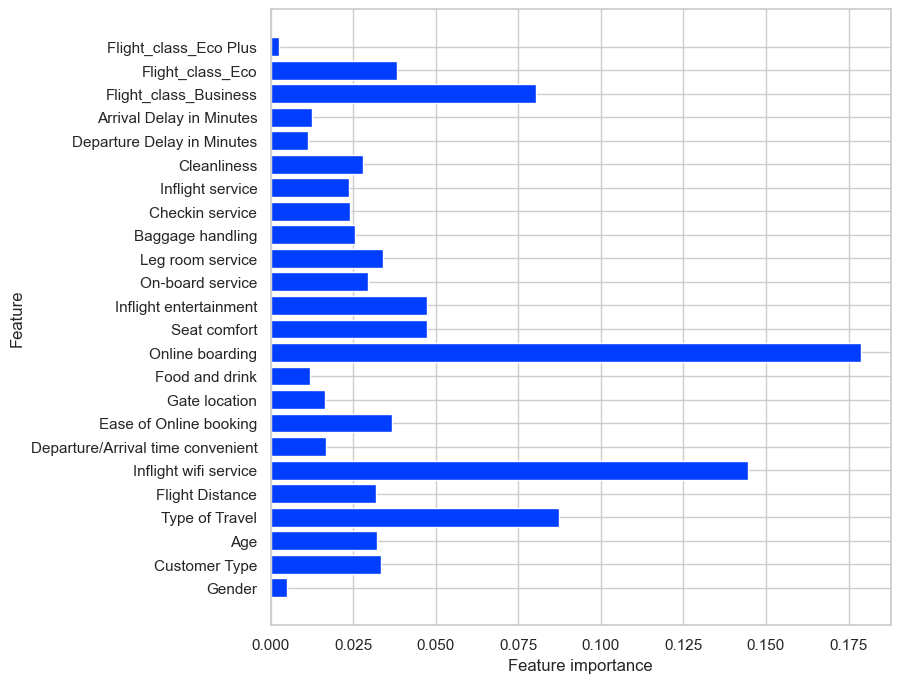

In [43]:
rfecv_mask = cv_selector.get_support() #list of booleans
rfecv_features = []

for bool, feature in zip(rfecv_mask, X.columns):
    if bool:
        rfecv_features.append(feature)

print("Optimal number of features :", cv_selector.n_features_)
print("Best features :", rfecv_features)
n_features = X.shape[1]
plt.figure(figsize=(8,8))
plt.barh(range(n_features), cv_estimator.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns.values)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [44]:
important_features_dict = {}
for idx, val in enumerate(cv_estimator.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(f'5 most important features: {important_features_list[:5]}')

for i in important_features_list:
    print(X.columns[i])

5 most important features: [10, 5, 3, 21, 11]
Online boarding
Inflight wifi service
Type of Travel
Flight_class_Business
Seat comfort
Inflight entertainment
Flight_class_Eco
Ease of Online booking
Leg room service
Customer Type
Age
Flight Distance
On-board service
Cleanliness
Baggage handling
Checkin service
Inflight service
Departure/Arrival time convenient
Gate location
Arrival Delay in Minutes
Food and drink
Departure Delay in Minutes
Gender
Flight_class_Eco Plus


In [45]:
X_new = X[['Online boarding', 'Inflight wifi service', 'Type of Travel', 'Flight_class_Business', 'Flight_class_Eco', 'Inflight entertainment', 'Customer Type', 'Leg room service', 'Ease of Online booking']]

In [46]:
X_new_train, X_new_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_new_train)
X_new_train = scaling.transform(X_new_train)
X_new_test = scaling.transform(X_new_test)

## Model Training and Evaluation

In [47]:
def print_metrics(y_true, y_pred):

    auc_score = roc_auc_score(y_true, y_pred)

    print("AUC-ROC: ", auc_score)

    print("Classification:\n{}".format(
        classification_report(
            y_true = le.inverse_transform(y_test),
            y_pred = le.inverse_transform(y_pred)
        )
    )
    )

    cm = confusion_matrix(y_true = le.inverse_transform(y_true),
                          y_pred = le.inverse_transform(y_pred))

    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm,
                                        display_labels = le.classes_)
    cm_display.plot()
    plt.show()

## LogisticRegression with GridSearchCV

In [48]:
def get_logr(mode = 'load'):

    path = DIRPATH + "/Models/"
    filename = 'log_r.sav'

    if mode == 'load':
        log_r = pickle.load(open(path + filename, 'rb'))
    else:

        log_r_param_grid = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'penalty': ['l2'],
        }

        log_r = GridSearchCV(
            estimator = LogisticRegression(max_iter = 1000),
            param_grid = log_r_param_grid,
            cv = 5,
            verbose = 1,
            scoring = 'accuracy',
            n_jobs = -1
        )
        log_r.fit(X_train, y_train)

        pickle.dump(log_r, open(path + filename, 'wb'))

    return log_r

In [49]:
log_r = get_logr()

AUC-ROC:  0.8699325123187744
Classification:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.90      0.89     21979
              satisfied       0.87      0.84      0.85     16985

               accuracy                           0.87     38964
              macro avg       0.87      0.87      0.87     38964
           weighted avg       0.87      0.87      0.87     38964



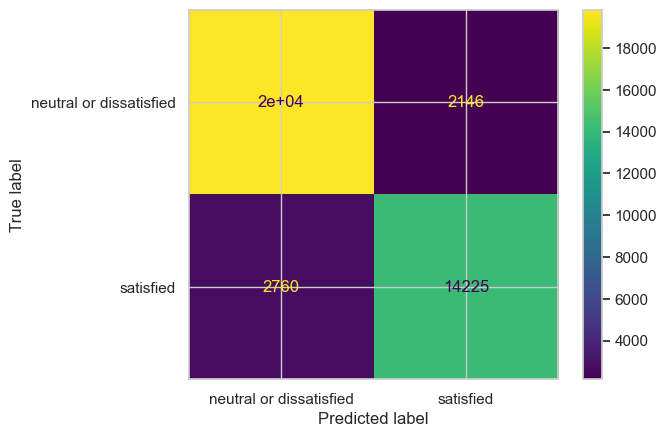

In [50]:
predictions_lr = log_r.predict(X_test)
print_metrics(y_true=y_test, y_pred=predictions_lr)

## K-nearest neighbor with Grid Search CV

In [51]:
def get_knn(mode = "load"):

    path = DIRPATH + "/Models/"
    filename = 'knn.sav'

    if mode == "load":
        knn = pickle.load(open(path + filename, 'rb'))
    else:

        knn_param_grid={"n_neighbors": [3, 5, 7], # Number of neighbors to use by default for kneighbors queries.
                        "weights": ["uniform","distance"] # Weight function used in prediction.
                        }
        knn = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = knn_param_grid,
                           scoring = "accuracy",
                           n_jobs = -1,
                           verbose = 1)

        knn.fit(X_train, y_train)

        pickle.dump(knn, open(path + filename, 'wb'))

    return knn

In [52]:
knn = get_knn()

AUC-ROC:  0.8699325123187744
Classification:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.90      0.89     21979
              satisfied       0.87      0.84      0.85     16985

               accuracy                           0.87     38964
              macro avg       0.87      0.87      0.87     38964
           weighted avg       0.87      0.87      0.87     38964



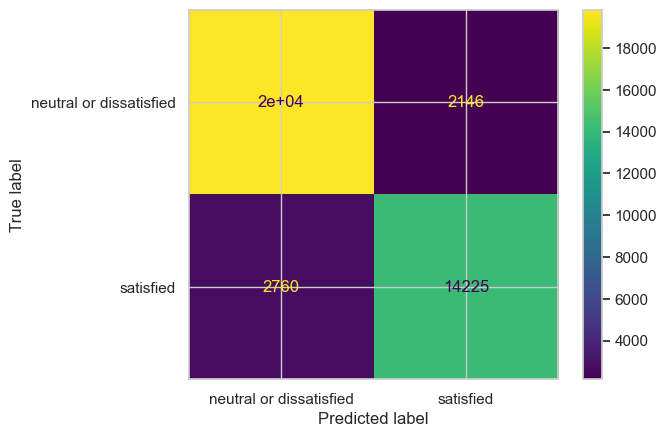

In [53]:
predictions_knn = knn.predict(X_test)
print_metrics(y_true = y_test, y_pred = predictions_knn)

## Random Forest with Randomized Search CV

In [54]:
def get_rf_rs(mode = "load"):

    path = DIRPATH + "/Models/"
    filename = 'rf_rs.sav'

    if mode == "load":
        rf_rs = pickle.load(open(path + filename, 'rb'))

    else:
        rf_parameters_grid = {
            'max_depth': [5, 15],
            'min_samples_leaf': [2, 8],
            'n_estimators': [50, 100],
            'max_features': [5, 10]
        }

        # define grid search
        rf_rs = RandomizedSearchCV(
            estimator = RandomForestClassifier(),
            param_distributions = rf_parameters_grid,
            cv = 10,
            verbose = 1,
            n_jobs = -1
        )
        rf_rs.fit(X_train, y_train)
        pickle.dump(knn, open(path + filename, 'wb'))

    return rf_rs

In [55]:
rf_rs = get_rf_rs()

AUC-ROC:  0.8699325123187744
Classification:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.90      0.89     21979
              satisfied       0.87      0.84      0.85     16985

               accuracy                           0.87     38964
              macro avg       0.87      0.87      0.87     38964
           weighted avg       0.87      0.87      0.87     38964



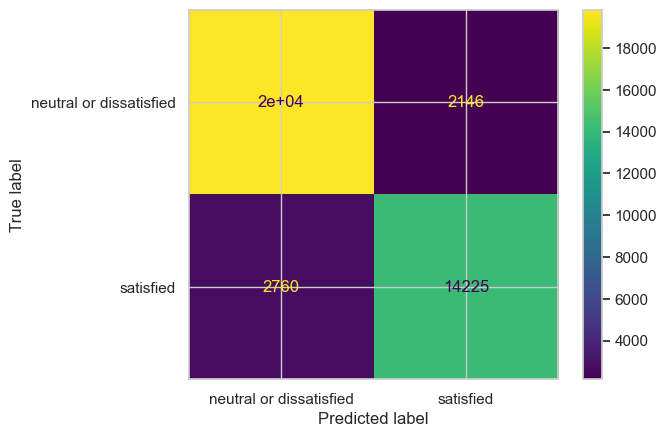

In [56]:
predictions_rf_rs = rf_rs.predict(X_test)
print_metrics(y_true = y_test, y_pred = predictions_rf_rs)

## Decision Tree Classifier with Grid Search CV

In [57]:
def get_dtc(mode = "load"):

    path = DIRPATH + "/Models/"
    filename = 'dtc.sav'

    if mode == "load":
        dtc = pickle.load(open(path + filename, 'rb'))

    else:
        # Grid search parameters of Decision Tree Classifier
        dtc_param_grid = {
            "min_samples_split": range(50,500,50), # The minimum number of samples required to split an internal node
            "max_depth": range(5,20,5) # The maximum depth of the tree.
        }

        dtc = GridSearchCV(
            estimator = DecisionTreeClassifier(random_state = 0),
            param_grid = dtc_param_grid,
            scoring = "accuracy",
            n_jobs = -1,
            verbose = 1)

        dtc.fit(X_train, y_train)
        pickle.dump(knn, open(path + filename, 'wb'))

    return dtc

In [58]:
dtc = get_dtc()

AUC-ROC:  0.8699325123187744
Classification:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.90      0.89     21979
              satisfied       0.87      0.84      0.85     16985

               accuracy                           0.87     38964
              macro avg       0.87      0.87      0.87     38964
           weighted avg       0.87      0.87      0.87     38964



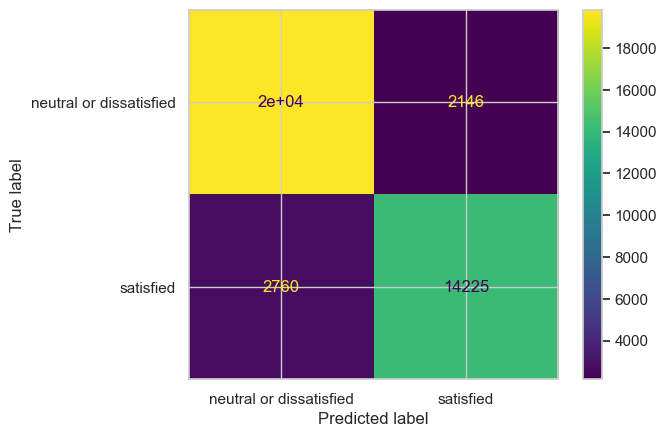

In [59]:
predictions_dtc = dtc.predict(X_test)
print_metrics(y_true = y_test, y_pred = predictions_dtc)

## Support Vector Machine with Grid Search CV

In [60]:
def get_svm(mode = 'load'):

    path = DIRPATH + "/Models/"
    filename = 'svc.sav'

    if mode == "load":
        svc = pickle.load(open(path + filename, 'rb'))
    else:
        # defining parameter range
        param_grid = {'C': [0.1, 1, 10],
                      'kernel': ['rbf'],
                      'gamma': ['scale', 'auto']}

        svc = GridSearchCV(SVC(random_state=False), param_grid, verbose = 3, cv=5, n_jobs=-1)

        svc.fit(X_new_train, y_train)
        pickle.dump(knn, open(path + filename, 'wb'))

    return svc

In [61]:
svc = get_svm()
svc

GridSearchCV(cv=5, estimator=SVC(random_state=False), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf']},
             verbose=3)

AUC-ROC:  0.9345877162190156
Classification:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.95      0.94     21979
              satisfied       0.94      0.91      0.93     16985

               accuracy                           0.94     38964
              macro avg       0.94      0.93      0.94     38964
           weighted avg       0.94      0.94      0.94     38964



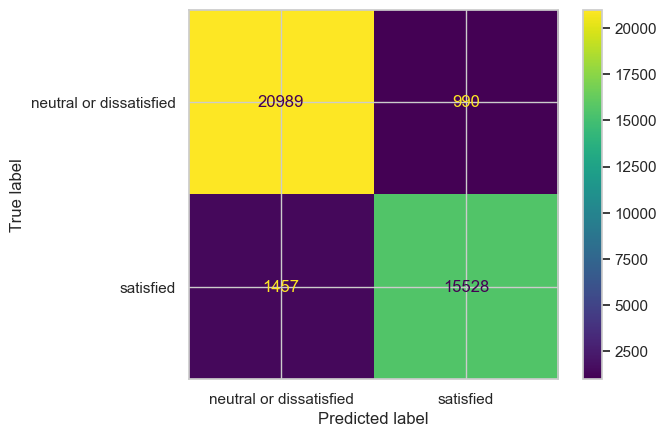

In [62]:
predictions_svm = svc.predict(X_new_test)
print_metrics(y_true = y_test, y_pred = predictions_svm)

## Bagging along with Random Forest

In [63]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

AUC-ROC:  0.9586432592151181
Classification:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.98      0.97     21979
              satisfied       0.97      0.94      0.95     16985

               accuracy                           0.96     38964
              macro avg       0.96      0.96      0.96     38964
           weighted avg       0.96      0.96      0.96     38964



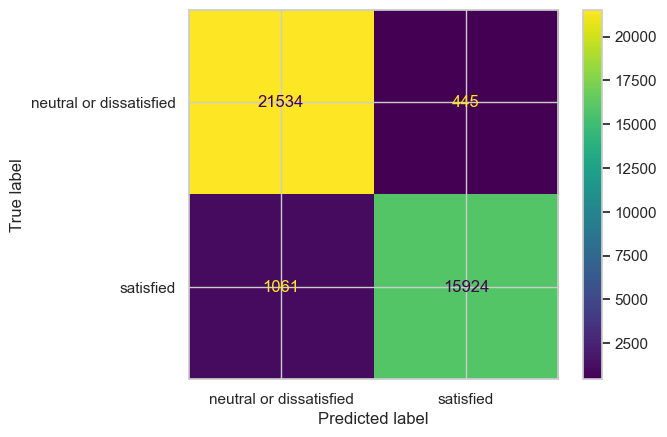

In [64]:
predictions_rf = rf.predict(X_test)
print_metrics(y_true = y_test, y_pred = predictions_rf)

## AdaBoost Classifier

In [65]:
adab = AdaBoostClassifier()
adab.fit(X_train, y_train)

AdaBoostClassifier()

AUC-ROC:  0.9240912783943964
Classification:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.93      0.94      0.93     21979
              satisfied       0.92      0.91      0.91     16985

               accuracy                           0.93     38964
              macro avg       0.93      0.92      0.92     38964
           weighted avg       0.93      0.93      0.93     38964



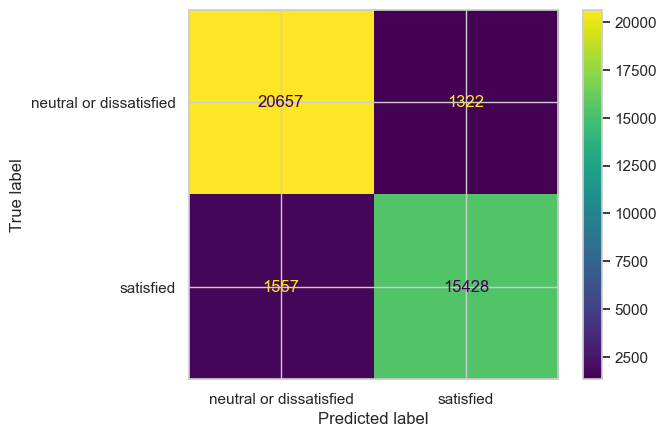

In [66]:
predictions_adab = adab.predict(X_test)
print_metrics(y_true = y_test, y_pred = predictions_adab)

## Multilayer Classifier

In [67]:
def get_mlp(mode = 'load'):

    path = DIRPATH + "/Models/"
    filename = 'mlp.h5'

    if mode == 'load':

        model = load_model(path + filename)
        model.summary()

    else:

        model = Sequential()

        model.add(Dense(22,activation = "relu", input_shape = (X_train.shape[1],)))
        model.add(Dropout(0.2))
        model.add(Dense(11,activation = "relu"))
        model.add(Dense(11,activation = "relu"))
        model.add(Dense(1,activation = "sigmoid"))

        model.compile(optimizer = "adam", loss = "binary_crossentropy")

        model.summary()

        stopping=EarlyStopping(monitor="val_loss",patience=15,restore_best_weights=True)
        history=model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[stopping],epochs=500,batch_size=64,verbose=1)

        model.save(path + filename)

    return model

In [68]:
model = get_mlp()

Metal device set to: Apple M2
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 22)                550       
                                                                 
 dropout_5 (Dropout)         (None, 22)                0         
                                                                 
 dense_21 (Dense)            (None, 11)                253       
                                                                 
 dense_22 (Dense)            (None, 11)                132       
                                                                 
 dense_23 (Dense)            (None, 1)                 12        
                                                                 
Total params: 947
Trainable params: 947
Non-trainable params: 0
_________________________________________________________________


2022-12-07 23:26:21.683938: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-07 23:26:21.684531: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [69]:
predictions_model = model.predict(X_test)
prediction_mlp = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions_model)]

  34/1218 [..............................] - ETA: 1s  

2022-12-07 23:26:22.080785: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-07 23:26:22.149855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1218/1218 [==============================] - 2s 2ms/step


AUC-ROC:  0.9477164925124624
Classification:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.98      0.96     21979
              satisfied       0.97      0.92      0.94     16985

               accuracy                           0.95     38964
              macro avg       0.95      0.95      0.95     38964
           weighted avg       0.95      0.95      0.95     38964



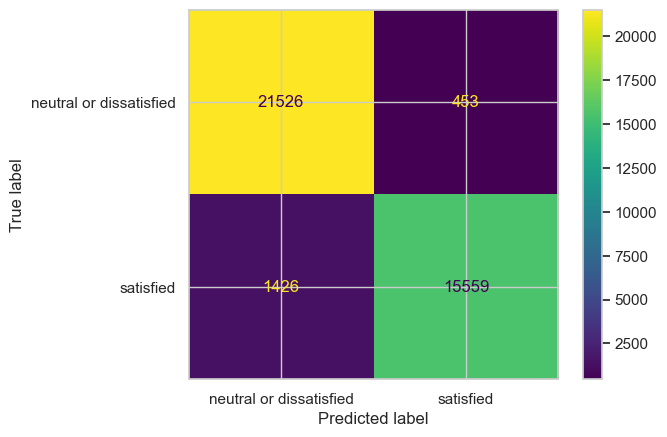

In [70]:
print_metrics(y_true = y_test, y_pred = prediction_mlp)

## Gradient Boosting XGBoost

In [71]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[23:26:25] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

AUC-ROC:  0.9608377121507172
Classification:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     21979
              satisfied       0.97      0.94      0.96     16985

               accuracy                           0.96     38964
              macro avg       0.96      0.96      0.96     38964
           weighted avg       0.96      0.96      0.96     38964



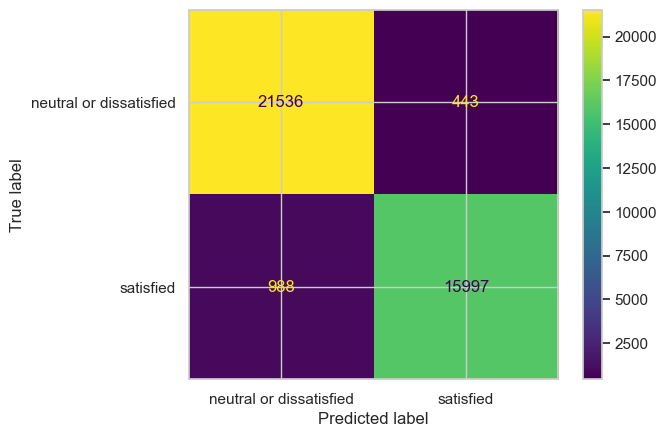

In [72]:
predictions_xgb = xgb.predict(X_test)
print_metrics(y_true = y_test, y_pred = predictions_xgb)

## Plotting Accuracy of Models

In [73]:
predictions = {"Logistic Regression":predictions_lr, "K-nearest neighbor":predictions_knn, "Random Forest":predictions_rf_rs, "Decision Tree Classifier":predictions_dtc, "Support Vector Machine":predictions_svm, "Bagging along with Random Forest":predictions_rf, "AdaBoost Classifier":predictions_adab, "Multilayer Perceptron":prediction_mlp, "XGBoost":predictions_xgb}

In [74]:
accuracy = []
algorithms = []
for algorithm in predictions.keys():
    accuracy.append(accuracy_score(y_true=y_test, y_pred=predictions[algorithm]) * 100)
    algorithms.append(algorithm)

[Text(0.5, 1.0, 'Accuracy of Models')]

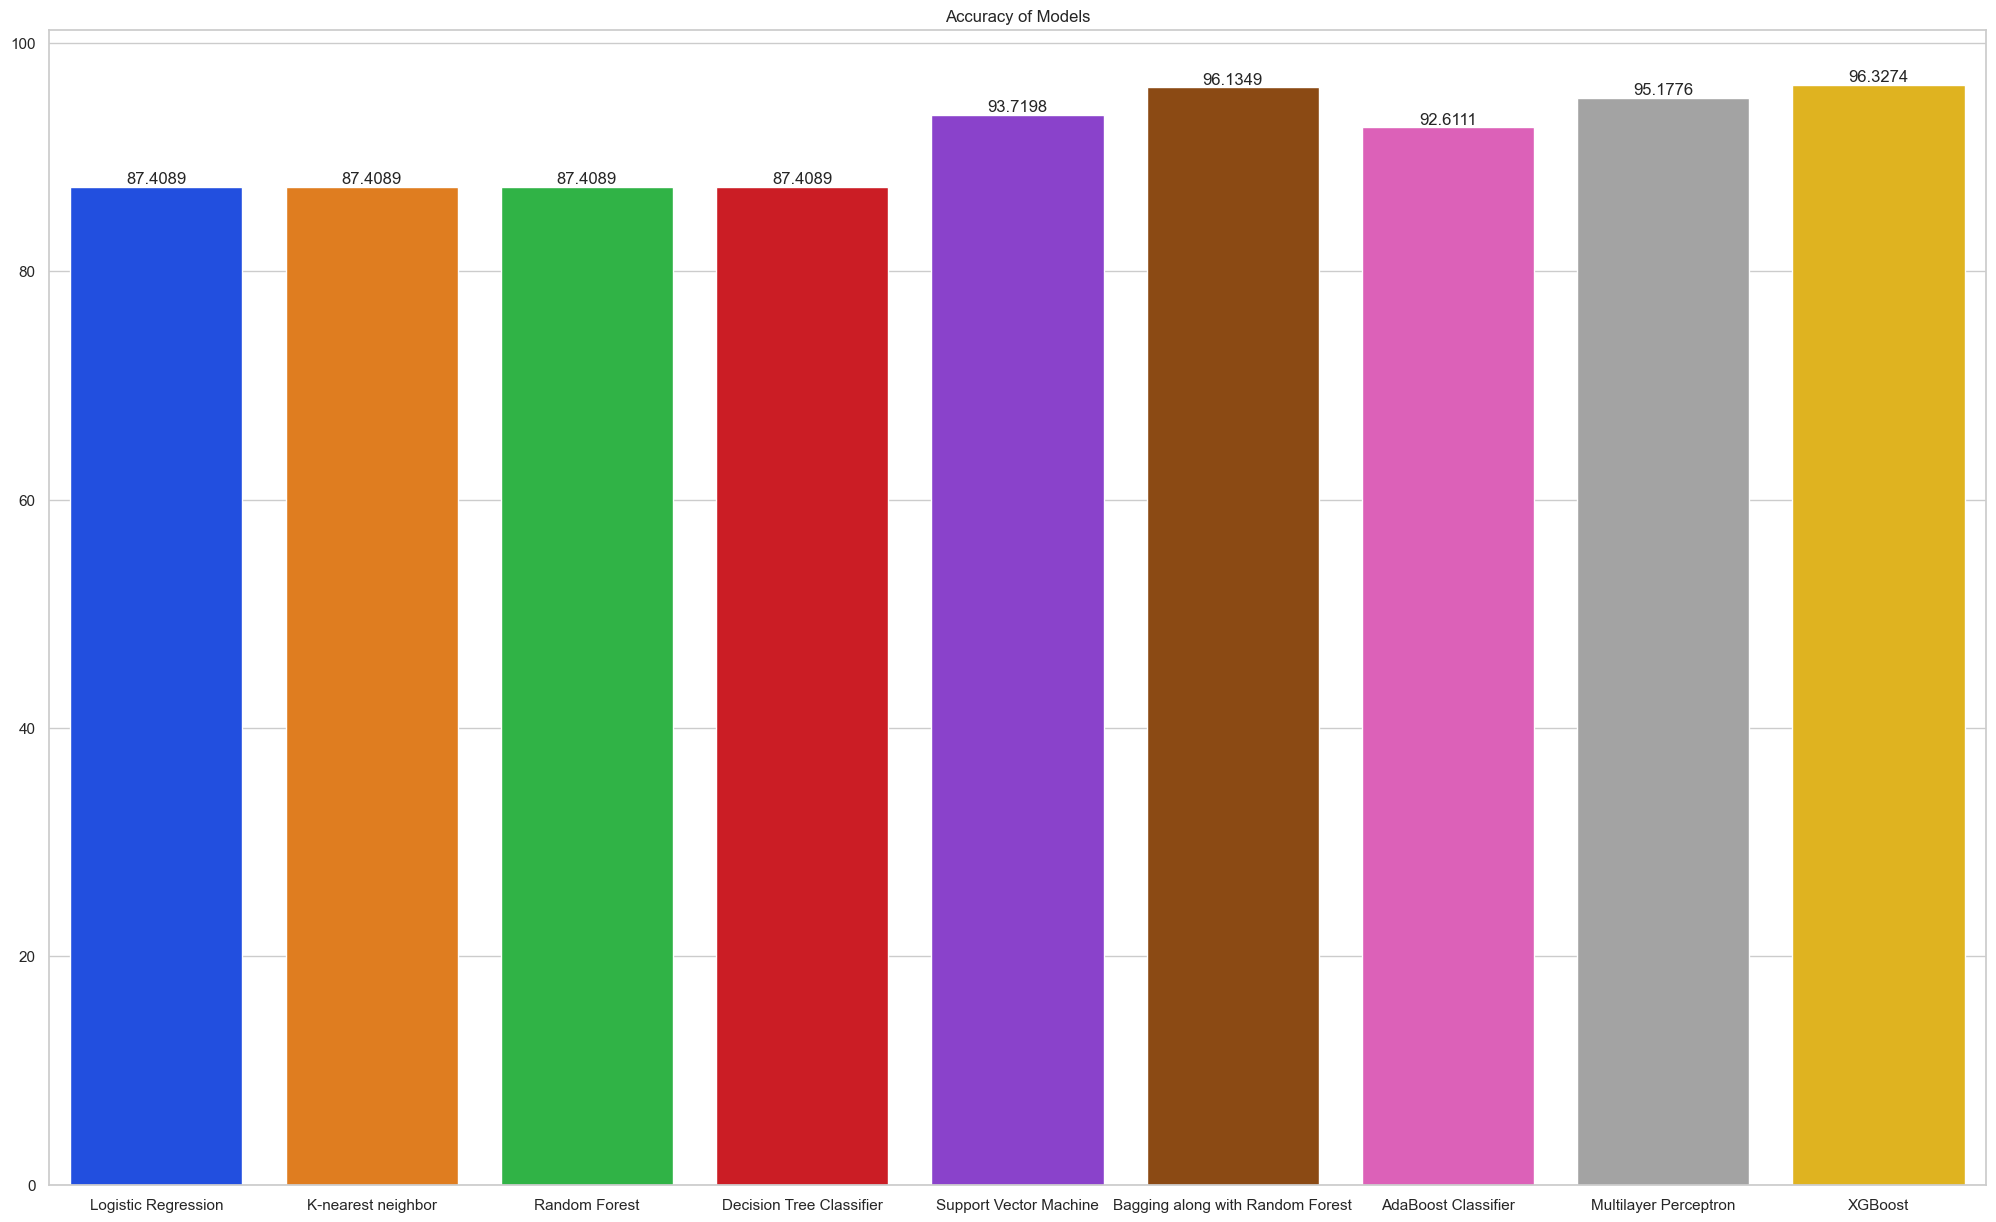

In [75]:
plt.figure(figsize=(25, 15))
ax = sns.barplot(x=algorithms, y=accuracy)
for i in ax.containers:
    ax.bar_label(i,)
ax.set(title='Accuracy of Models')

## Gradient Boosting XGBoost has Highest Accuracy

In [76]:
xgb_feature = []
for i in range(len(X.columns)):
    xgb_feature.append({"column": X.columns[i], "imp": xgb.feature_importances_[i]})

In [77]:
xgb_feature = sorted(xgb_feature, key=lambda d: d['imp'], reverse=True)

In [78]:
xgb_feature

[{'column': 'Online boarding', 'imp': 0.40303716},
 {'column': 'Type of Travel', 'imp': 0.15745471},
 {'column': 'Inflight wifi service', 'imp': 0.09978128},
 {'column': 'Customer Type', 'imp': 0.062160615},
 {'column': 'Flight_class_Business', 'imp': 0.050121073},
 {'column': 'Inflight entertainment', 'imp': 0.035410997},
 {'column': 'Checkin service', 'imp': 0.027924465},
 {'column': 'Baggage handling', 'imp': 0.022024196},
 {'column': 'Cleanliness', 'imp': 0.020282231},
 {'column': 'Seat comfort', 'imp': 0.020267155},
 {'column': 'Leg room service', 'imp': 0.01886592},
 {'column': 'Gate location', 'imp': 0.015197486},
 {'column': 'On-board service', 'imp': 0.014476278},
 {'column': 'Inflight service', 'imp': 0.012750903},
 {'column': 'Ease of Online booking', 'imp': 0.010176982},
 {'column': 'Age', 'imp': 0.006130966},
 {'column': 'Arrival Delay in Minutes', 'imp': 0.0047337874},
 {'column': 'Departure/Arrival time convenient', 'imp': 0.004445619},
 {'column': 'Flight_class_Eco', 'i

[Text(0.5, 1.0, 'Feature Importance of XGB')]

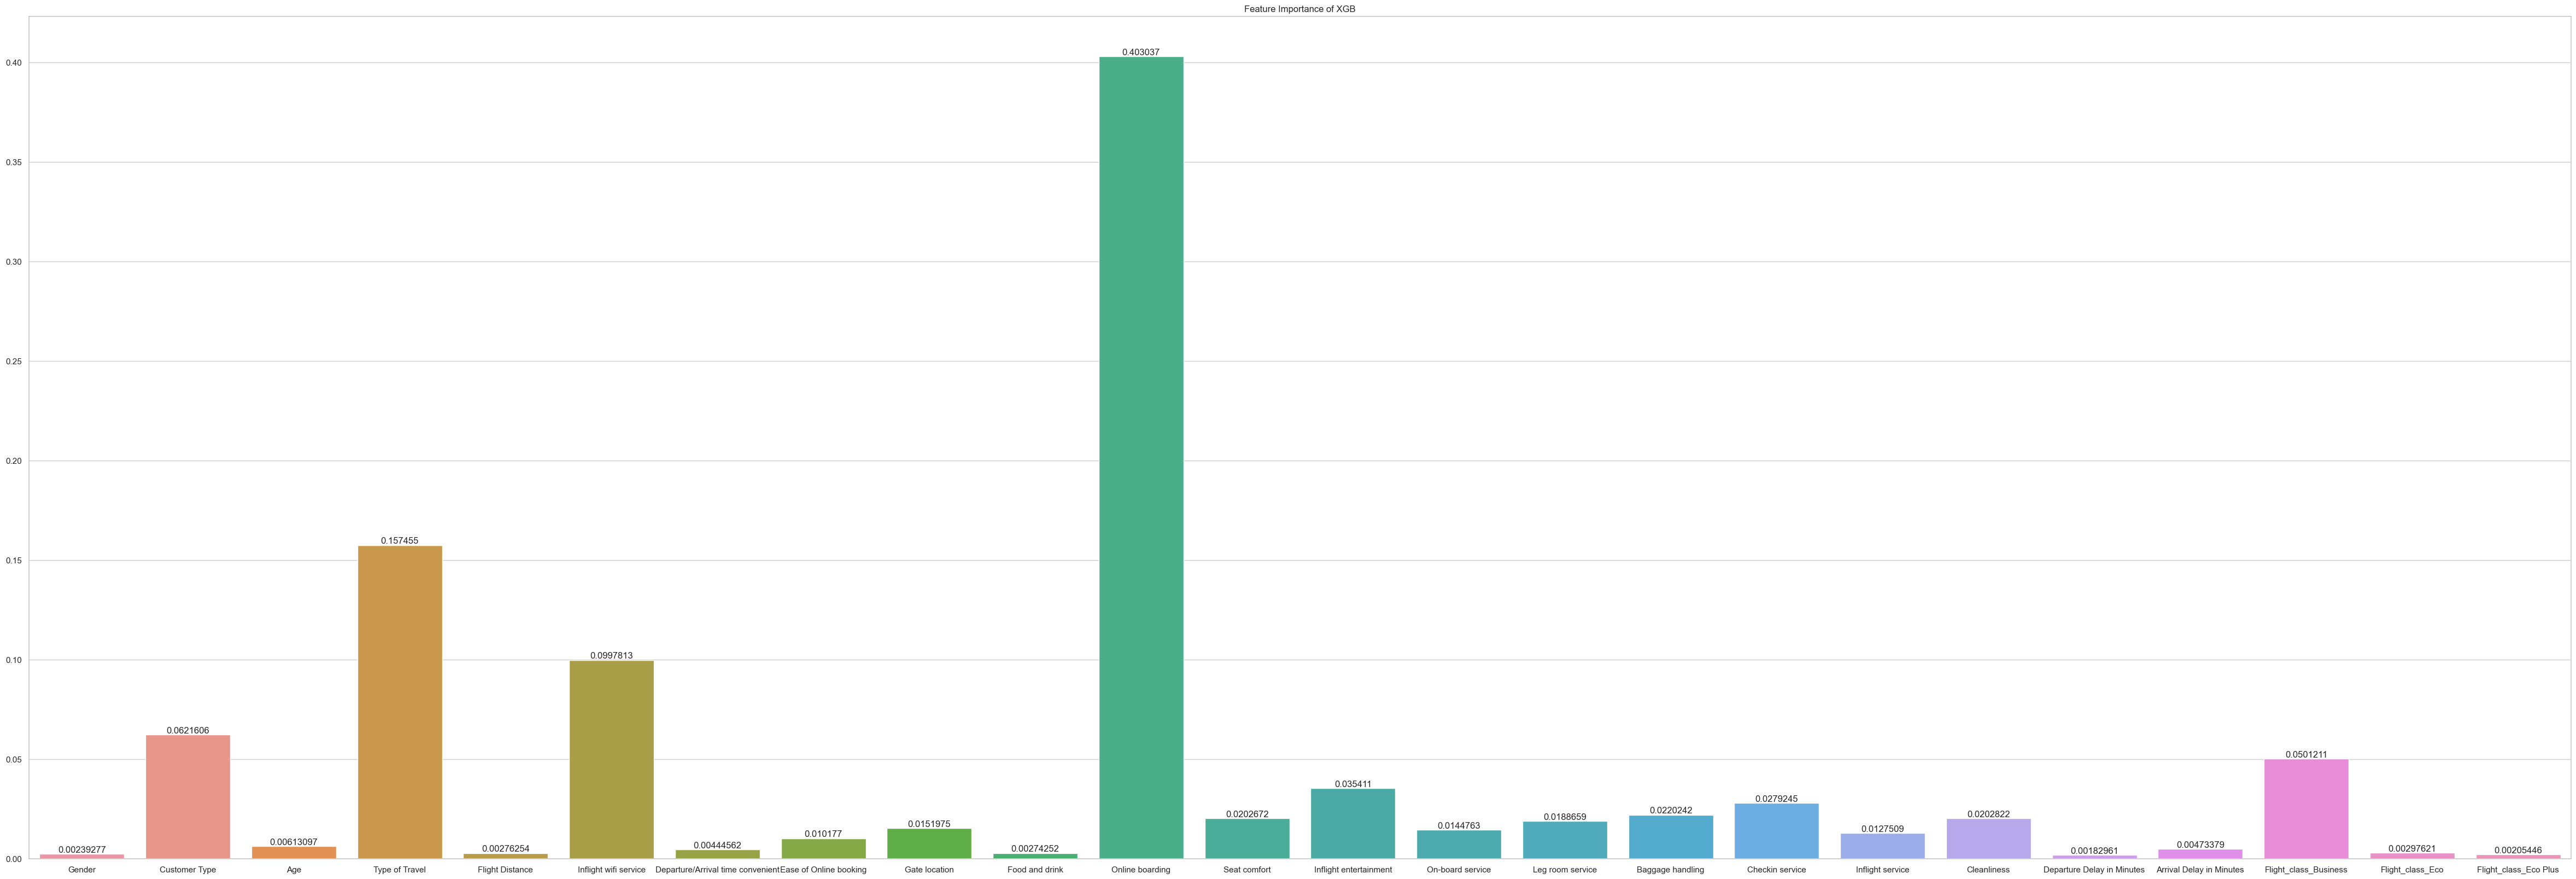

In [79]:
plt.figure(figsize=(60, 20))
ax = sns.barplot(x=X.columns, y=xgb.feature_importances_)
for i in ax.containers:
    ax.bar_label(i,)
ax.set(title='Feature Importance of XGB')